In [1]:
# Tannotationshis Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
dataset_list = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        dataset_list.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Nov.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2020-Feb.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Oct.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Dec.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2020-Jan.csv


In [2]:
df_list = []
for file_path in tqdm(dataset_list):
    df_list.append(pd.read_csv(file_path))
    break

  0%|          | 0/5 [00:13<?, ?it/s]


In [3]:
dataset = pd.concat(df_list)
dataset

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


In [4]:
dataset = dataset.sort_values('event_time', ascending=False).drop_duplicates(subset=['user_id', 'product_id'])

# Exploratory Data Analysis
as always :3

From the EDA below, I know that
1. Category code can be splitted by dot into 3 new columns
2. Rating rules -> view: 2, cart: 3, remove_from_cart: 1, purchase: 4 <br>
The reason for rating rules, in my personal opinion, is because we can't really tell the users preferences if they only view the product pages, but we can tell that the users don't need the product when removing it from cart.

Most of the data are coming from appliances.environment.vacuum

In [5]:
dataset['category_code'] = dataset['category_code'].apply(lambda x: x.split('.') if type(x)==str else None)
dataset['cat1'] = dataset['category_code'].apply(lambda x: None if str(x)=='None' else x[0] if len(x)>0 else None)
dataset['cat2'] = dataset['category_code'].apply(lambda x: None if str(x)=='None' else x[1] if len(x)>1 else None)
dataset['cat3'] = dataset['category_code'].apply(lambda x: None if str(x)=='None' else x[2] if len(x)>2 else None)

In [6]:
dataset = dataset[['event_type', 'user_id', 'product_id', 'brand', 'price', 'cat1', 'cat2', 'cat3']]

In [7]:
for col in dataset.columns:
    print(f"{col} has {dataset[col].nunique()} values")
    if dataset[col].nunique() < 20:
        print(f"Those are: {dataset[col].unique()}")

event_type has 4 values
Those are: ['view' 'remove_from_cart' 'cart' 'purchase']
user_id has 368232 values
product_id has 43419 values
brand has 239 values
price has 2537 values
cat1 has 5 values
Those are: [None 'apparel' 'appliances' 'furniture' 'stationery' 'accessories']
cat2 has 8 values
Those are: [None 'glove' 'environment' 'living_room' 'personal' 'cartrige' 'bag'
 'cosmetic_bag' 'bathroom']
cat3 has 6 values
Those are: [None 'vacuum' 'cabinet' 'hair_cutter' 'bath' 'air_conditioner' 'chair']


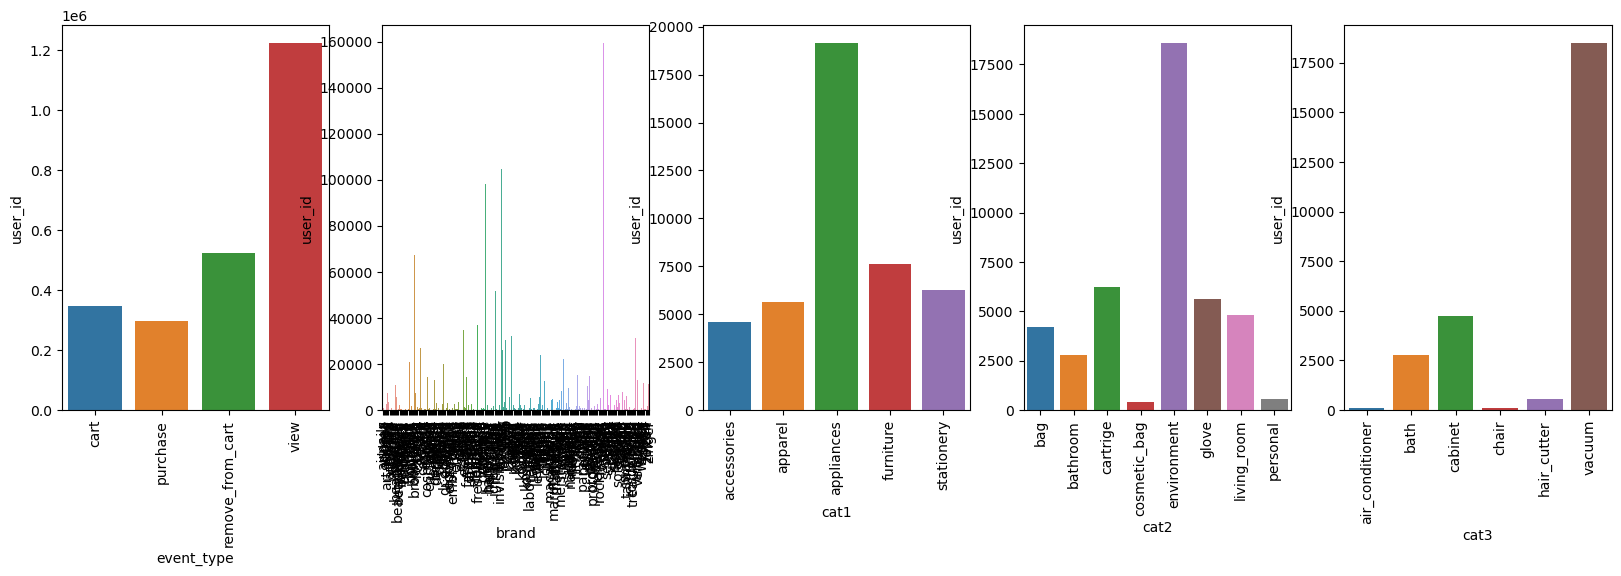

In [8]:
fig, ax = plt.subplots(1,5,figsize=(20,5))
for idx, col in enumerate(dataset.select_dtypes('O').columns):
    data = dataset.groupby(col)['user_id'].count().reset_index()
    sns.barplot(data=data, x=col, y='user_id', ax=ax[idx])
    ax[idx].set_xticklabels(labels=ax[idx].get_xticklabels(), rotation = 90)

In [9]:
dataset['rating'] = dataset['event_type'].apply(lambda x: 1 if x=='remove_from_cart' else 2 if x=='view' else 3 if x=='cart' else 4)

# Factorization Machine!

In [10]:
!pip install deepctr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.8.0
    Uninstalling h5py-3.8.0:
      Successfully uninstalled h5py-3.8.0


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from deepctr.models import DeepFM
from deepctr.estimator import DeepFMEstimator
from deepctr.estimator.inputs import input_fn_pandas
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [12]:
sparse_features = ['user_id', 'product_id', 'brand', 'cat1', 'cat2', 'cat3']
dense_features = ['price']
target = 'rating'

In [13]:
dataset[sparse_features] = dataset[sparse_features].fillna('-1', )
dataset[dense_features] = dataset[dense_features].fillna('other')

In [14]:
data = dataset.copy()

for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

In [15]:
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

In [16]:
fixlen_feature_columns = [SparseFeat(feat, data[feat].max() + 1, embedding_dim=4) for feat in sparse_features] + [DenseFeat(feat, 1, ) for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [17]:
train, test = train_test_split(data, test_size=0.2, random_state=2020)
train_model_input = {name: train[name] for name in feature_names}
test_model_input = {name: test[name] for name in feature_names}

In [18]:
# 4.Define Model,train,predict and evaluate
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression',
              dnn_hidden_units=(64, 16), l2_reg_linear=1e-05,)

In [19]:
model.compile("RMSProp", "mse", metrics=['mse'], )
history = model.fit(train_model_input, train[target].values, batch_size=256*256*3, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
8/8 - 6s - loss: 5.6934 - mse: 5.6932 - val_loss: 5.0492 - val_mse: 5.0484
Epoch 2/10
8/8 - 1s - loss: 4.6206 - mse: 4.6192 - val_loss: 4.0336 - val_mse: 4.0313
Epoch 3/10
8/8 - 1s - loss: 3.5979 - mse: 3.5947 - val_loss: 3.0198 - val_mse: 3.0154
Epoch 4/10
8/8 - 1s - loss: 2.6058 - mse: 2.6004 - val_loss: 2.0966 - val_mse: 2.0898
Epoch 5/10
8/8 - 1s - loss: 1.7634 - mse: 1.7556 - val_loss: 1.3913 - val_mse: 1.3822
Epoch 6/10
8/8 - 1s - loss: 1.1811 - mse: 1.1712 - val_loss: 0.9841 - val_mse: 0.9731
Epoch 7/10
8/8 - 1s - loss: 0.8926 - mse: 0.8813 - val_loss: 0.8332 - val_mse: 0.8214
Epoch 8/10
8/8 - 1s - loss: 0.8011 - mse: 0.7894 - val_loss: 0.7948 - val_mse: 0.7832
Epoch 9/10
8/8 - 1s - loss: 0.7689 - mse: 0.7576 - val_loss: 0.7720 - val_mse: 0.7609
Epoch 10/10
8/8 - 0s - loss: 0.7421 - mse: 0.7312 - val_loss: 0.7522 - val_mse: 0.7414


In [20]:
 pred_ans = model.predict(test_model_input, batch_size=256*256*3)

In [21]:
test = pd.DataFrame(test_model_input).merge(dataset[target], left_index=True, right_index=True)
test['yhat'] = pred_ans

In [22]:
test

,user_id,product_id,brand,cat1,cat2,cat3,price,rating,yhat
4228760,250529,3488,0,0,0,0,0.200909,2,2.396369
452414,38381,29309,0,0,0,0,0.206558,2,2.212225
4452134,75737,365,198,3,5,6,0.261059,2,1.937083
3840241,325281,4570,0,0,0,0,0.212084,2,2.048485
4060135,344051,29458,0,0,0,0,0.244112,4,2.059160
...,...,...,...,...,...,...,...,...,...
4063323,347627,13775,0,0,0,0,0.240526,2,2.027493
2613642,287975,16545,120,0,0,0,0.214442,4,2.202349
1095126,29275,3575,0,0,0,0,0.205846,1,2.098828
3691904,325775,15266,0,0,0,0,0.199607,2,1.973323


In [23]:
np.square(test['rating'] - test['yhat']).mean()

0.7406653313718107

<Axes: ylabel='Frequency'>

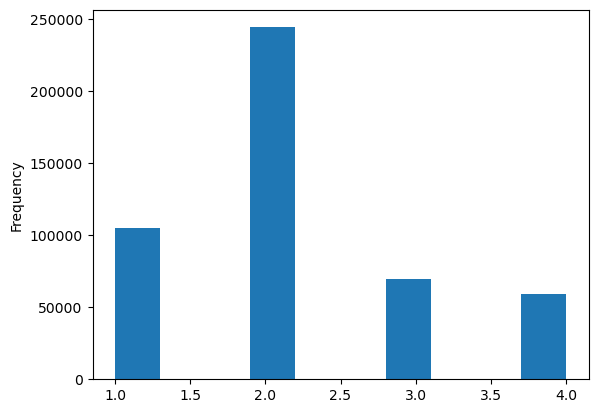

In [24]:
test['rating'].plot(kind='hist')

<Axes: ylabel='Frequency'>

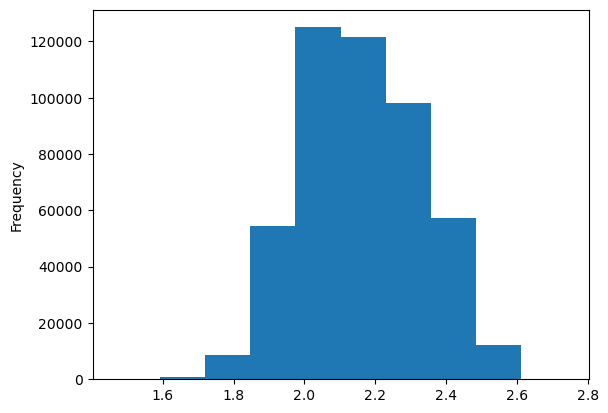

In [25]:
test['yhat'].plot(kind='hist')

In [26]:
test['rank'] = test.groupby('user_id')['yhat'].rank(method='max', ascending=False)

In [27]:
test

,user_id,product_id,brand,cat1,cat2,cat3,price,rating,yhat,rank
4228760,250529,3488,0,0,0,0,0.200909,2,2.396369,3.0
452414,38381,29309,0,0,0,0,0.206558,2,2.212225,6.0
4452134,75737,365,198,3,5,6,0.261059,2,1.937083,1.0
3840241,325281,4570,0,0,0,0,0.212084,2,2.048485,56.0
4060135,344051,29458,0,0,0,0,0.244112,4,2.059160,1.0
...,...,...,...,...,...,...,...,...,...,...
4063323,347627,13775,0,0,0,0,0.240526,2,2.027493,1.0
2613642,287975,16545,120,0,0,0,0.214442,4,2.202349,1.0
1095126,29275,3575,0,0,0,0,0.205846,1,2.098828,8.0
3691904,325775,15266,0,0,0,0,0.199607,2,1.973323,1.0


# Evaluation

In [28]:
test.sort_values('yhat', ascending=False, inplace=True)
test_eval = test.groupby('user_id').agg(list_product=('product_id', list), rating=('rating', list), yhat=('yhat', list))


In [29]:
# Let's see if we change the threshold of which ratings define whether users will click or not
threshold_rating = [2,3,4]

for threshold in threshold_rating:
    test_eval[f'reciprocal_rank_@{threshold}'] = test_eval['rating'].apply(lambda x: 1/(np.where(np.array(x)>=threshold)[0][0] + 1) if len(np.where(np.array(x)>=threshold)[0])>0 else None)

In [30]:
test_eval.head(30)

,list_product,rating,yhat,reciprocal_rank_@2,reciprocal_rank_@3,reciprocal_rank_@4
user_id,,,,,,
0,[306],[2],[2.062591075897217],1.0,NaN,NaN
1,"[19372, 41191, 8233, 8195, 8178]","[2, 2, 2, 2, 2]","[2.237269639968872, 2.087641477584839, 2.01859...",1.0,NaN,NaN
2,"[1634, 10508, 112, 1294]","[3, 3, 3, 3]","[2.1831133365631104, 2.1677510738372803, 2.132...",1.0,1.000000,NaN
6,"[18143, 40554, 38370, 7701, 18561]","[4, 1, 2, 1, 4]","[2.1448442935943604, 2.1238598823547363, 2.025...",1.0,1.000000,1.000000
7,[12272],[4],[2.166236162185669],1.0,1.000000,1.000000
8,"[21645, 36095, 41647, 38368, 38367, 43005, 284...","[1, 2, 2, 1, 1, 3, 4, 2, 1]","[2.508291006088257, 2.415562868118286, 2.38119...",0.5,0.166667,0.142857
12,"[18143, 41110]","[3, 2]","[2.0911200046539307, 2.011227607727051]",1.0,1.000000,NaN
15,"[13215, 33614]","[3, 2]","[2.2695810794830322, 2.2422780990600586]",1.0,1.000000,NaN
16,[9974],[2],[1.9958635568618774],1.0,NaN,NaN


In [31]:
test_eval.describe()

,reciprocal_rank_@2,reciprocal_rank_@3,reciprocal_rank_@4
count,144039.000000,49049.000000,21388.000000
mean,0.961126,0.814088,0.765913
std,0.147398,0.293308,0.319336
min,0.021739,0.011111,0.005155
25%,1.000000,0.500000,0.500000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'reciprocal_rank_@2'}>,
        <Axes: title={'center': 'reciprocal_rank_@3'}>],
       [<Axes: title={'center': 'reciprocal_rank_@4'}>, <Axes: >]],
      dtype=object)

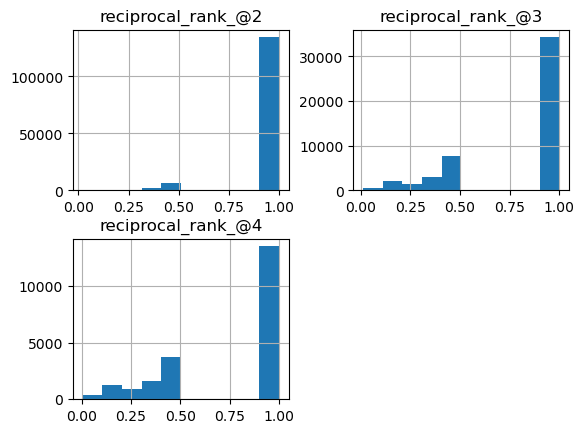

In [32]:
test_eval.hist()